In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from pathlib import Path

np.random.seed(42)


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from pathlib import Path

np.random.seed(42)


In [5]:
print(path)


C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [6]:
data_dir = Path(path)
test_path = Path(path) / "Test"
train_path = Path(path) / "Train"

In [7]:
no_categories = len(os.listdir(train_path))
print(no_categories)

43


In [8]:
# okay, so we have 43 categories, let's assign labels to each category
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


In [9]:
train_folders = os.listdir(train_path)

train_number = []
class_num = []


for folder in train_folders:
    train_files = Path(train_path) / folder
    train_number.append(len(list(train_files.iterdir())))
    class_num.append(classes[int(folder)])


zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]


    


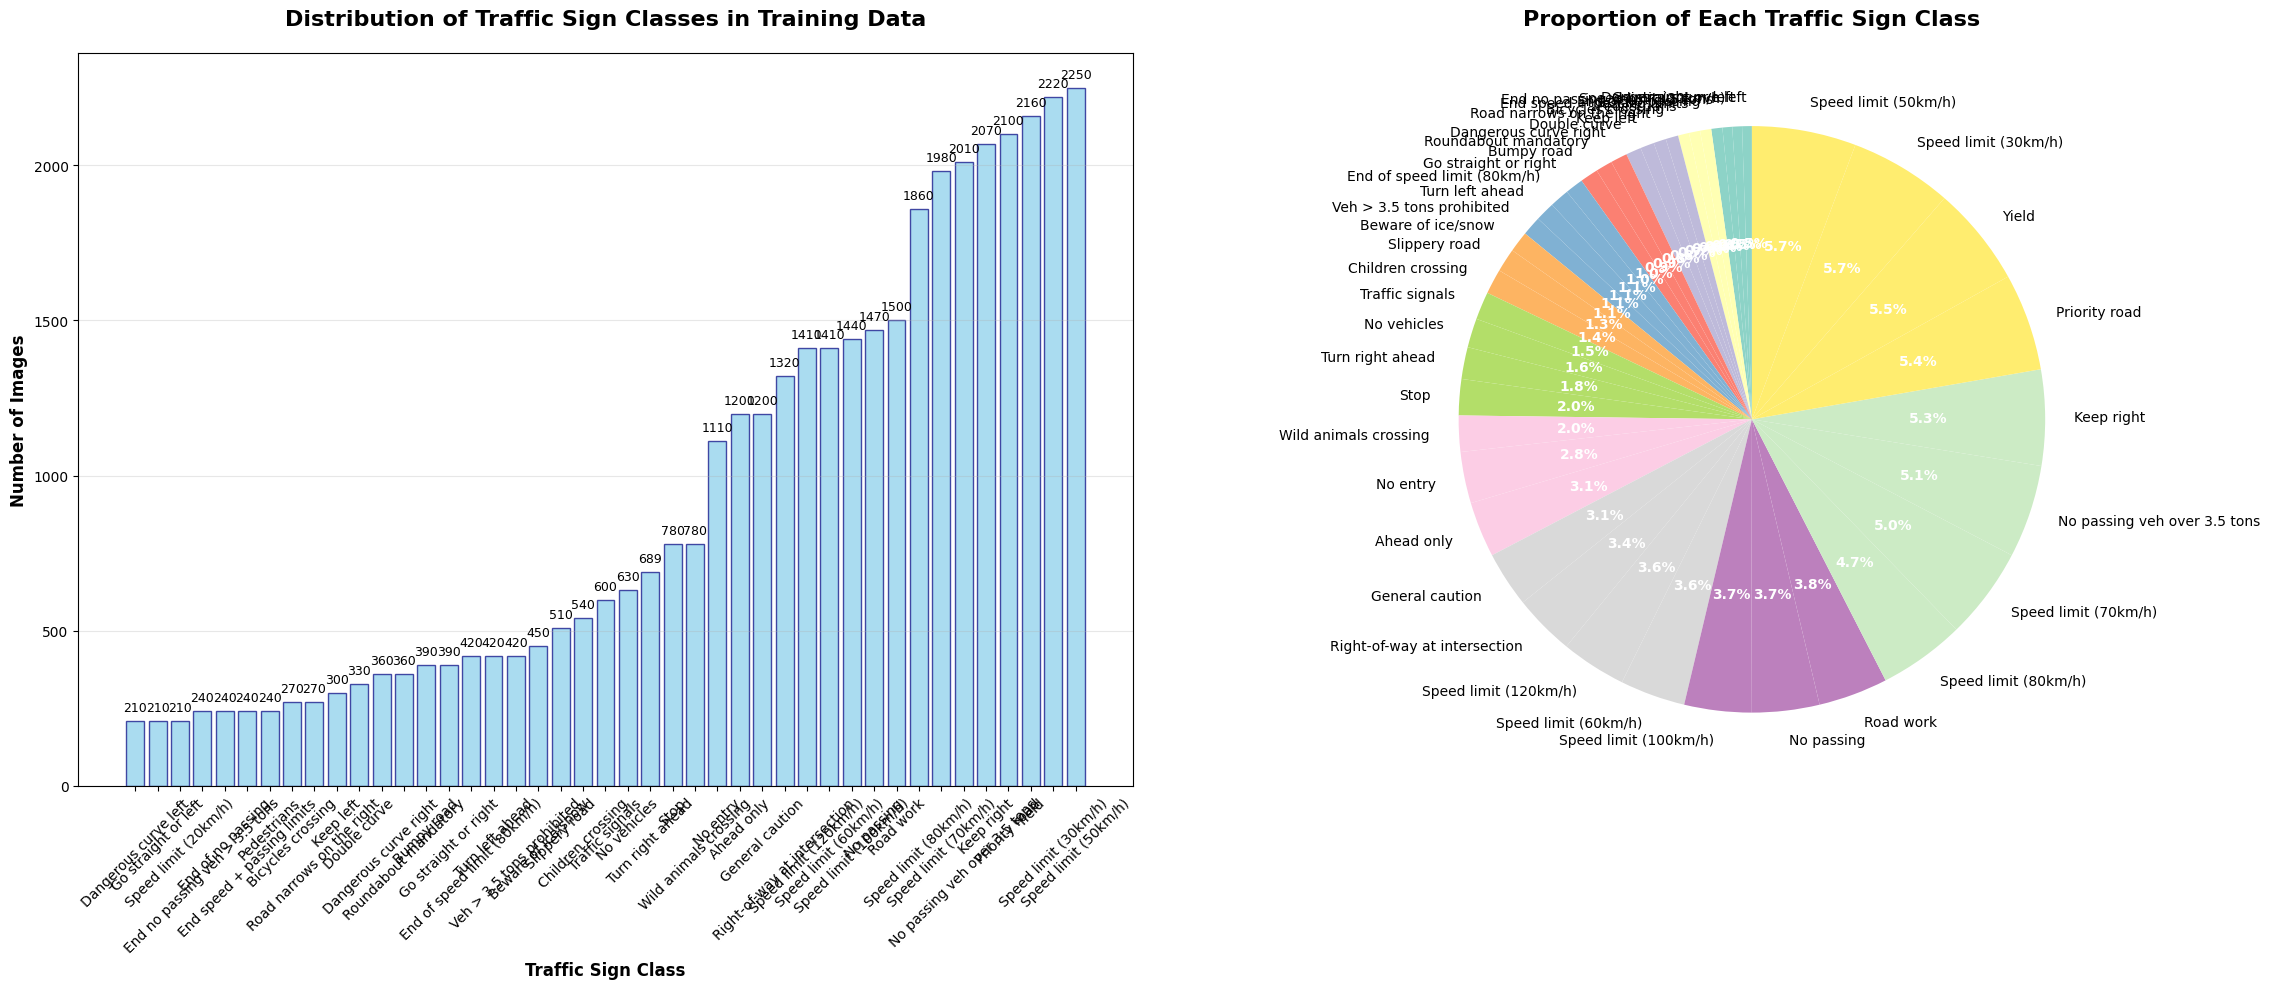

=== DATA DISTRIBUTION OBSERVATIONS ===
Total training images: 39209
Number of classes: 43
Average images per class: 911.8
Class with most images: Speed limit (50km/h) (2250 images)
Class with least images: Dangerous curve left (210 images)
Standard deviation: 687.7
Class imbalance ratio (max/min): 10.7:1
⚠️  Significant class imbalance detected - consider data augmentation for minority classes


In [10]:
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Bar chart
bars = ax1.bar(class_num, train_number, color='skyblue', edgecolor='navy', alpha=0.7)
ax1.set_title('Distribution of Traffic Sign Classes in Training Data', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Traffic Sign Class', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(train_number)*0.01,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(class_num)))
wedges, texts, autotexts = ax2.pie(train_number, labels=class_num, autopct='%1.1f%%', 
                                   colors=colors, startangle=90)
ax2.set_title('Proportion of Each Traffic Sign Class', fontsize=16, fontweight='bold', pad=20)

# Style the pie chart text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# Print observations
print("=== DATA DISTRIBUTION OBSERVATIONS ===")
print(f"Total training images: {sum(train_number)}")
print(f"Number of classes: {len(class_num)}")
print(f"Average images per class: {sum(train_number)/len(class_num):.1f}")
print(f"Class with most images: {class_num[train_number.index(max(train_number))]} ({max(train_number)} images)")
print(f"Class with least images: {class_num[train_number.index(min(train_number))]} ({min(train_number)} images)")
print(f"Standard deviation: {np.std(train_number):.1f}")

# Check for class imbalance
imbalance_ratio = max(train_number) / min(train_number)
print(f"Class imbalance ratio (max/min): {imbalance_ratio:.1f}:1")

if imbalance_ratio > 5:
    print("⚠️  Significant class imbalance detected - consider data augmentation for minority classes")
elif imbalance_ratio > 2:
    print("⚠️  Moderate class imbalance - monitor training performance")
else:
    print("✅  Relatively balanced dataset")

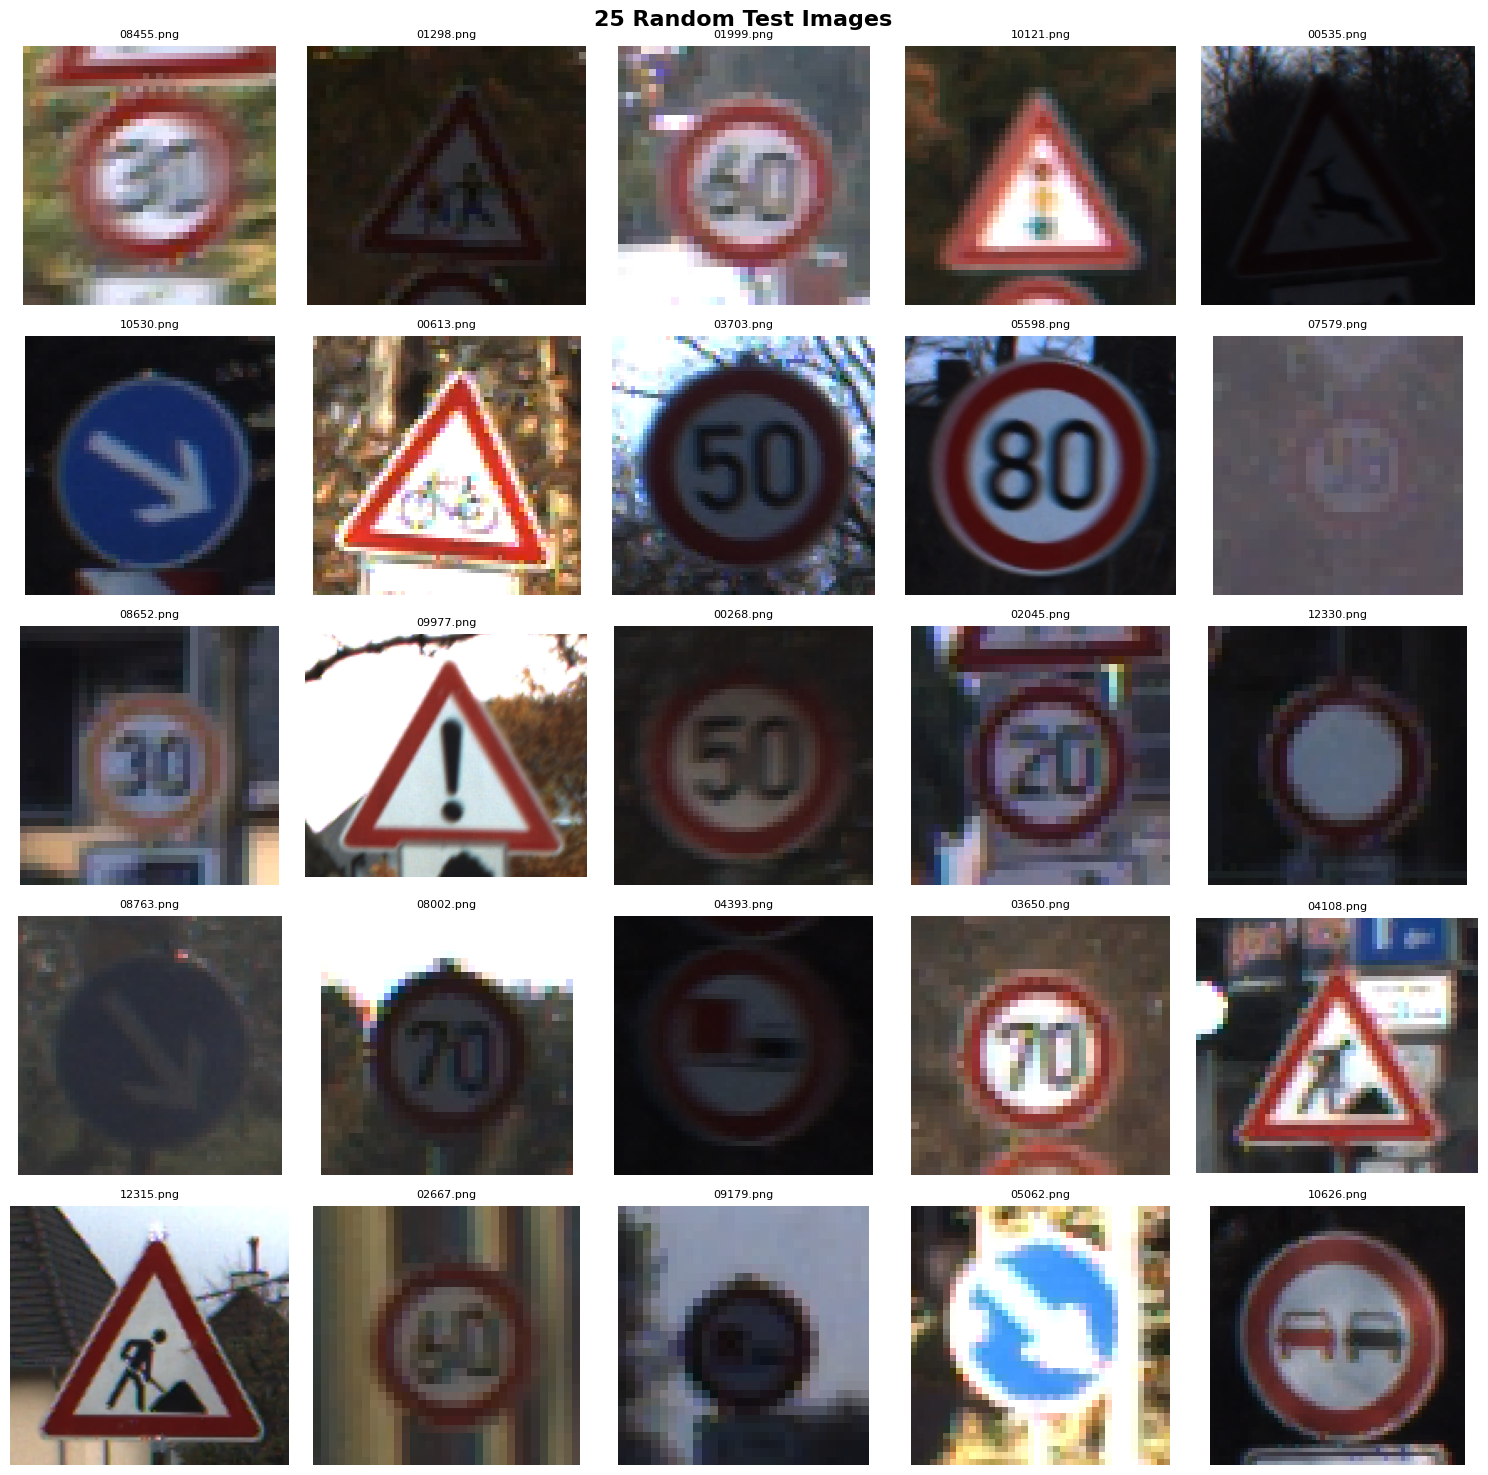

Displayed 25 random images from 12630 total images


In [11]:
import random
# Get all image files from the test directory
image_files = []
for file in os.listdir(test_path):
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.ppm')):
        image_files.append(file)

if len(image_files) >= 25:
    # Select 25 random images
    random_images = random.sample(image_files, 25)
    
    # Create 5x5 subplot grid
    fig, axes = plt.subplots(5, 5, figsize=(15, 15))
    fig.suptitle('25 Random Test Images', fontsize=16, fontweight='bold')
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    for idx, image_name in enumerate(random_images):
        image_path = test_path / image_name
        
        # Read and display image
        img = cv2.imread(str(image_path))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            
            axes[idx].imshow(img)
            axes[idx].set_title(image_name, fontsize=8)
            axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Displayed 25 random images from {len(image_files)} total images")
    
elif len(image_files) > 0:
    print(f"Only {len(image_files)} images found, need at least 25")
else:
    print("No image files found in test directory")

# All set, now it is time to actually set up the training data and train a model on it

In [12]:
IMG_HEIGHT = 32
IMG_WIDTH = 32

image_data = []
image_labels = []

print(f"Starting to load images from {data_dir / 'Train'}...")

for i in range(no_categories):
    category_path = data_dir / 'Train' / str(i)
    images = os.listdir(category_path)
    print(f"\nProcessing category {i} ({len(images)} images) from {category_path}...")

    loaded_count = 0
    skipped_count = 0

    for idx, img in enumerate(images, 1):
        try:
            img_path = category_path / img
            image = cv2.imread(str(img_path))

            if image is not None:
                image_fromarray = Image.fromarray(image, 'RGB')
                resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
                image_data.append(np.array(resize_image))
                image_labels.append(i)
                loaded_count += 1
            else:
                print(f"[Warning] Could not load image: {img}")
                skipped_count += 1

        except Exception as e:
            print(f"[Error] Processing {img}: {str(e)}")
            skipped_count += 1

        # Print status every 50 images
        if idx % 50 == 0:
            print(f"  Processed {idx}/{len(images)} images...")

    print(f"Finished category {i}: {loaded_count} loaded, {skipped_count} skipped.")

image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(f"\nAll categories processed.")
print(f"Total images loaded: {len(image_data)}")
print(f"Image data shape: {image_data.shape}")
print(f"Image labels shape: {image_labels.shape}")

Starting to load images from C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train...

Processing category 0 (210 images) from C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train\0...
  Processed 50/210 images...
  Processed 100/210 images...
  Processed 150/210 images...
  Processed 200/210 images...
Finished category 0: 210 loaded, 0 skipped.

Processing category 1 (2220 images) from C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train\1...
  Processed 50/2220 images...
  Processed 100/2220 images...
  Processed 150/2220 images...
  Processed 200/2220 images...
  Processed 250/2220 images...
  Processed 300/2220 images...
  Processed 350/2220 images...
  Processed 400/2220 images...
  Processed 450/2220 images...
  Processed 500/2220 images...
  Processed 550/2220 images...
  Processed 600/2220 images...
  Processed 650/2220 image

In [13]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [14]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255   #normailize to prevent exploding gradient
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 32, 32, 3)
X_valid.shape (11763, 32, 32, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [15]:
# our categories are ordinal, we need to convert them to 1's and 0's we can do this by one hot encoding so that our model understands it
y_train = keras.utils.to_categorical(y_train, no_categories)
y_val = keras.utils.to_categorical(y_val, no_categories)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [16]:
#ill make 2 models, one is custom the other is mobilenetv2, and compare their accuracies later on
#custom
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

inputs = keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3), name="input")

x = keras.layers.Conv2D(16, (3,3), activation="relu")(inputs)
x = keras.layers.Conv2D(32, (3,3), activation="relu")(x)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.BatchNormalization(axis=-1)(x)

x = keras.layers.Conv2D(64, (3,3), activation="relu")(x)
x = keras.layers.Conv2D(128, (3,3), activation="relu")(x)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.BatchNormalization(axis=-1)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(43, activation="softmax")(x)

custom_model = keras.Model(inputs=inputs, outputs=outputs, name="customcnn")

custom_model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)





In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping

lr = 0.001
epochs = 30

# Optimizer
opt = Adam(learning_rate=lr)

custom_model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

# Learning rate scheduler (replaces 'decay' argument)
def lr_scheduler(epoch, lr):
    decay_rate = lr / (epochs * 0.5)
    return lr * (1 / (1 + decay_rate * epoch))

lr_callback = LearningRateScheduler(lr_scheduler, verbose=1)

# Other callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

callbacks = [lr_callback, reduce_lr, early_stop]

# Model summary
custom_model.summary()

Model: "customcnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,761,099 (6.72 MB)

 Trainable params: 1,759,755 (6.71 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [18]:
# --------------------------
# Check GPU
# --------------------------
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU detected and memory growth enabled")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected, training will use CPU")


print(tf.__version__)

No GPU detected, training will use CPU
2.21.0-dev20250903


In [19]:
print(path)


C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [20]:
data_dir = Path(path)
test_path = Path(path) / "Test"
train_path = Path(path) / "Train"

In [21]:
no_categories = len(os.listdir(train_path))
print(no_categories)

43


In [22]:
# okay, so we have 43 categories, let's assign labels to each category
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


In [23]:
train_folders = os.listdir(train_path)

train_number = []
class_num = []


for folder in train_folders:
    train_files = Path(train_path) / folder
    train_number.append(len(list(train_files.iterdir())))
    class_num.append(classes[int(folder)])


zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]


    


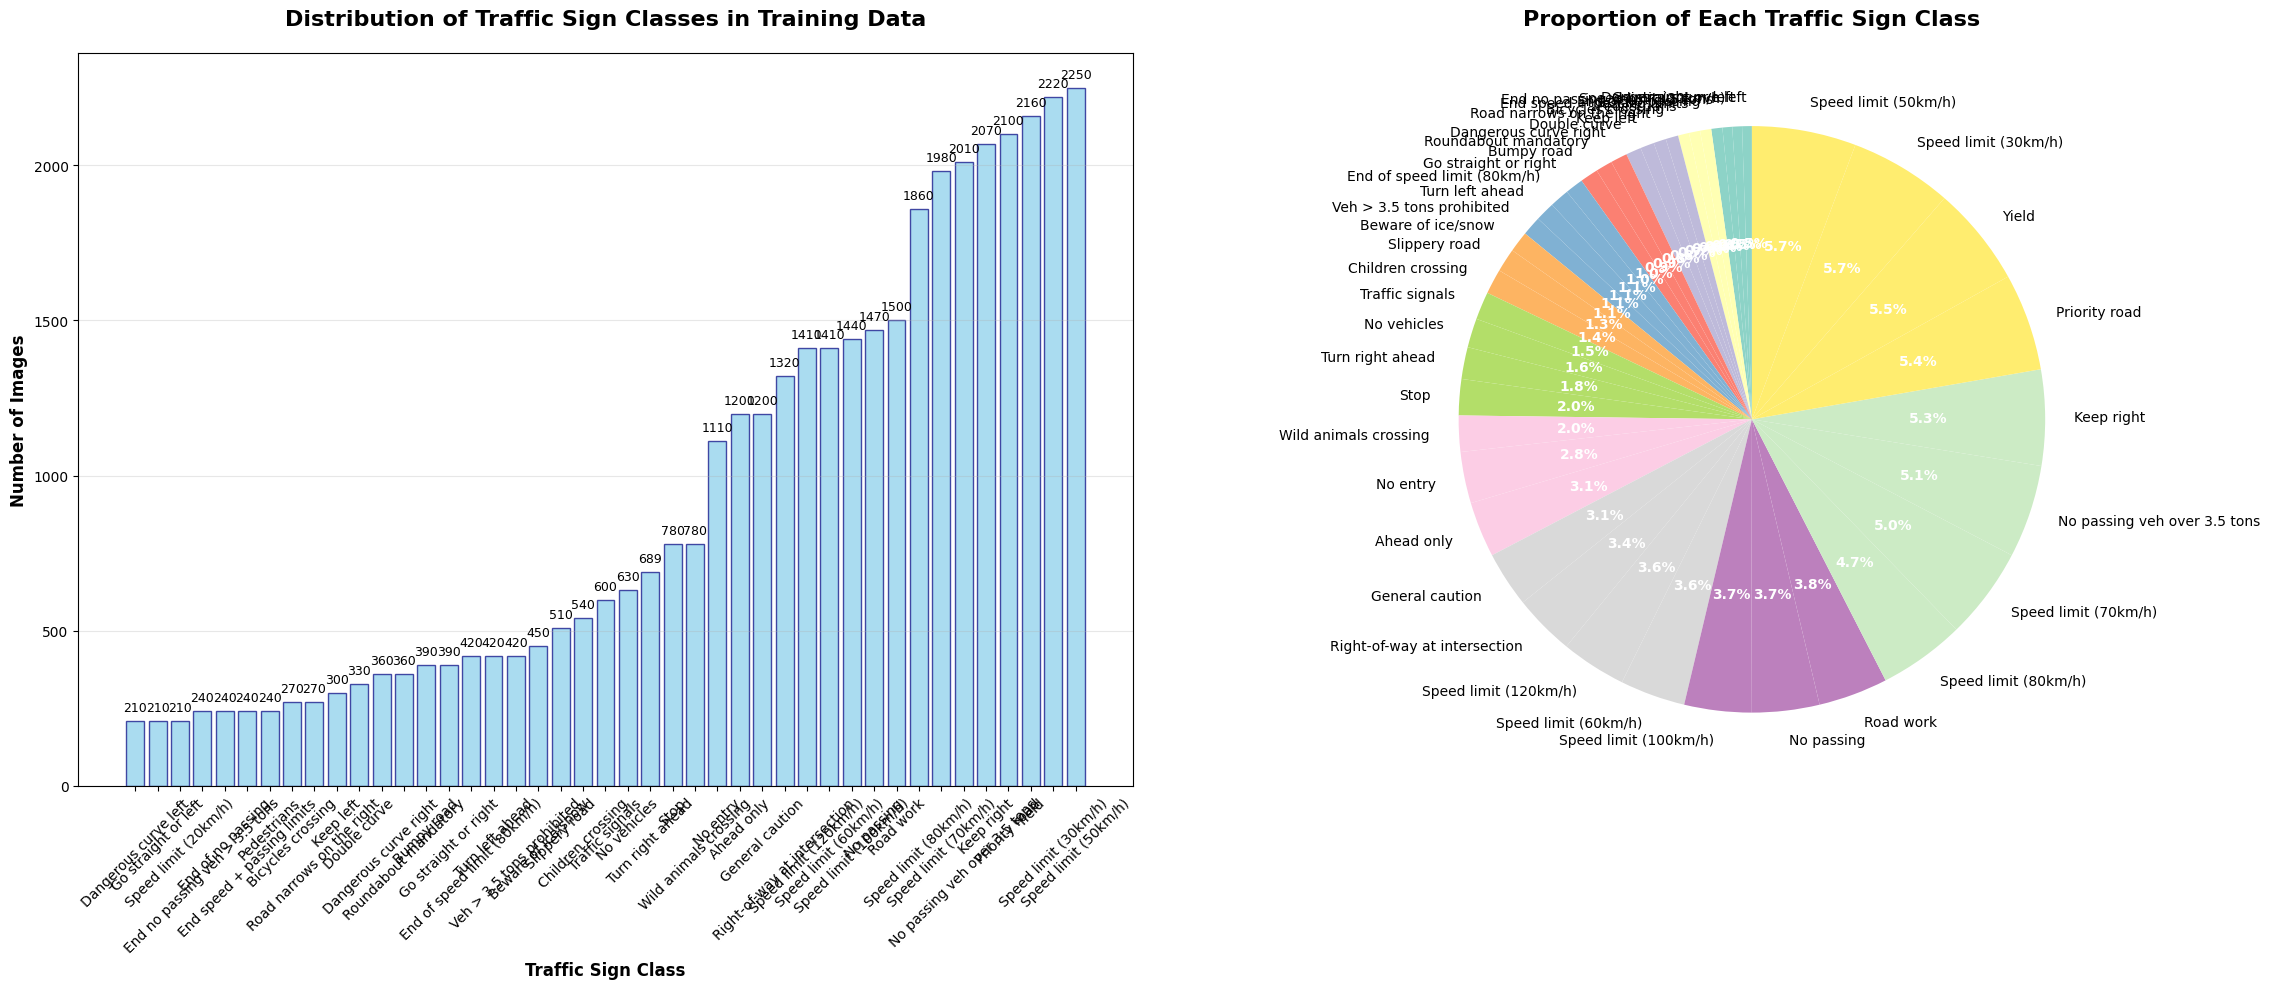

=== DATA DISTRIBUTION OBSERVATIONS ===
Total training images: 39209
Number of classes: 43
Average images per class: 911.8
Class with most images: Speed limit (50km/h) (2250 images)
Class with least images: Dangerous curve left (210 images)
Standard deviation: 687.7
Class imbalance ratio (max/min): 10.7:1
⚠️  Significant class imbalance detected - consider data augmentation for minority classes


In [24]:
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Bar chart
bars = ax1.bar(class_num, train_number, color='skyblue', edgecolor='navy', alpha=0.7)
ax1.set_title('Distribution of Traffic Sign Classes in Training Data', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Traffic Sign Class', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(train_number)*0.01,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(class_num)))
wedges, texts, autotexts = ax2.pie(train_number, labels=class_num, autopct='%1.1f%%', 
                                   colors=colors, startangle=90)
ax2.set_title('Proportion of Each Traffic Sign Class', fontsize=16, fontweight='bold', pad=20)

# Style the pie chart text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# Print observations
print("=== DATA DISTRIBUTION OBSERVATIONS ===")
print(f"Total training images: {sum(train_number)}")
print(f"Number of classes: {len(class_num)}")
print(f"Average images per class: {sum(train_number)/len(class_num):.1f}")
print(f"Class with most images: {class_num[train_number.index(max(train_number))]} ({max(train_number)} images)")
print(f"Class with least images: {class_num[train_number.index(min(train_number))]} ({min(train_number)} images)")
print(f"Standard deviation: {np.std(train_number):.1f}")

# Check for class imbalance
imbalance_ratio = max(train_number) / min(train_number)
print(f"Class imbalance ratio (max/min): {imbalance_ratio:.1f}:1")

if imbalance_ratio > 5:
    print("⚠️  Significant class imbalance detected - consider data augmentation for minority classes")
elif imbalance_ratio > 2:
    print("⚠️  Moderate class imbalance - monitor training performance")
else:
    print("✅  Relatively balanced dataset")

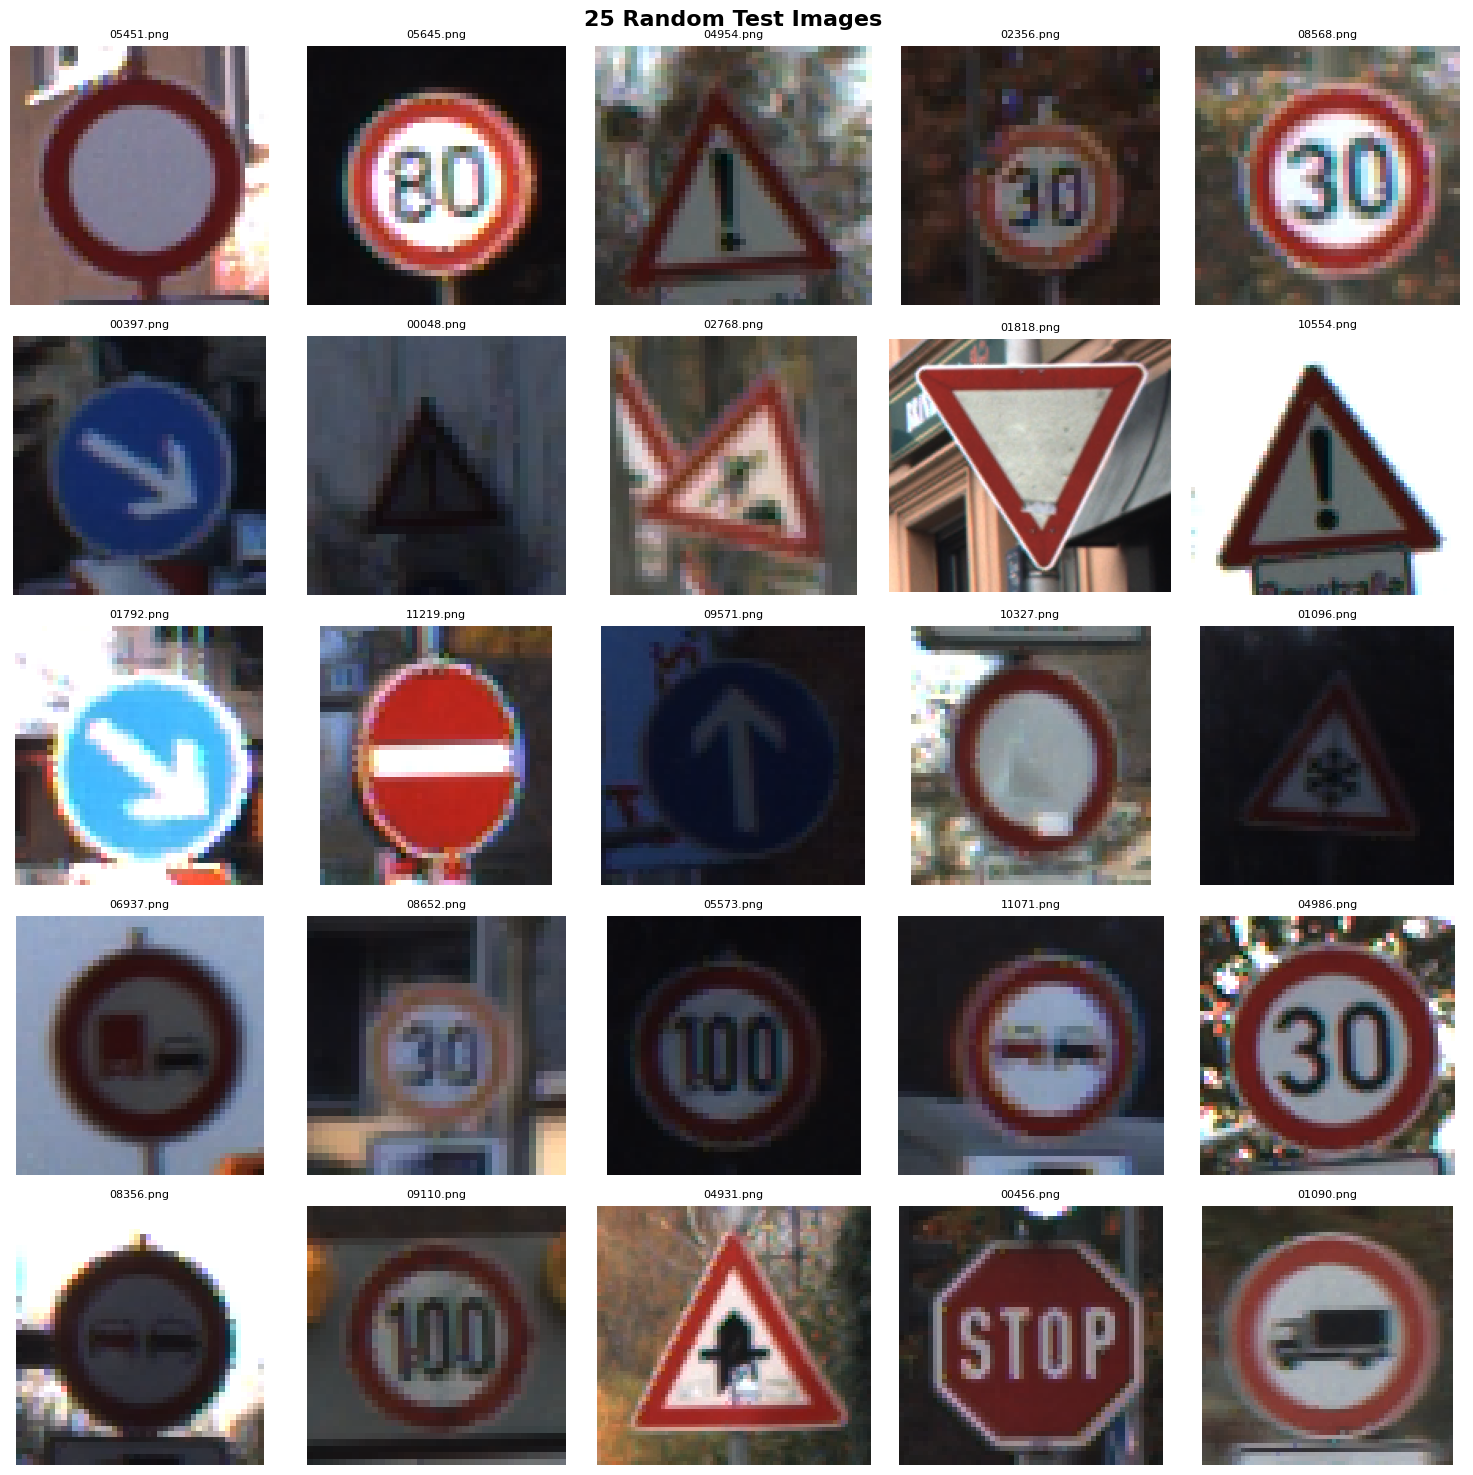

Displayed 25 random images from 12630 total images


In [25]:
import random
# Get all image files from the test directory
image_files = []
for file in os.listdir(test_path):
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.ppm')):
        image_files.append(file)

if len(image_files) >= 25:
    # Select 25 random images
    random_images = random.sample(image_files, 25)
    
    # Create 5x5 subplot grid
    fig, axes = plt.subplots(5, 5, figsize=(15, 15))
    fig.suptitle('25 Random Test Images', fontsize=16, fontweight='bold')
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    for idx, image_name in enumerate(random_images):
        image_path = test_path / image_name
        
        # Read and display image
        img = cv2.imread(str(image_path))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            
            axes[idx].imshow(img)
            axes[idx].set_title(image_name, fontsize=8)
            axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Displayed 25 random images from {len(image_files)} total images")
    
elif len(image_files) > 0:
    print(f"Only {len(image_files)} images found, need at least 25")
else:
    print("No image files found in test directory")

# All set, now it is time to actually set up the training data and train a model on it

In [26]:
IMG_HEIGHT = 32
IMG_WIDTH = 32

image_data = []
image_labels = []

print(f"Starting to load images from {data_dir / 'Train'}...")

for i in range(no_categories):
    category_path = data_dir / 'Train' / str(i)
    images = os.listdir(category_path)
    print(f"\nProcessing category {i} ({len(images)} images) from {category_path}...")

    loaded_count = 0
    skipped_count = 0

    for idx, img in enumerate(images, 1):
        try:
            img_path = category_path / img
            image = cv2.imread(str(img_path))

            if image is not None:
                image_fromarray = Image.fromarray(image, 'RGB')
                resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
                image_data.append(np.array(resize_image))
                image_labels.append(i)
                loaded_count += 1
            else:
                print(f"[Warning] Could not load image: {img}")
                skipped_count += 1

        except Exception as e:
            print(f"[Error] Processing {img}: {str(e)}")
            skipped_count += 1

        # Print status every 50 images
        if idx % 50 == 0:
            print(f"  Processed {idx}/{len(images)} images...")

    print(f"Finished category {i}: {loaded_count} loaded, {skipped_count} skipped.")

image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(f"\nAll categories processed.")
print(f"Total images loaded: {len(image_data)}")
print(f"Image data shape: {image_data.shape}")
print(f"Image labels shape: {image_labels.shape}")

Starting to load images from C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train...

Processing category 0 (210 images) from C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train\0...
  Processed 50/210 images...
  Processed 100/210 images...
  Processed 150/210 images...
  Processed 200/210 images...
Finished category 0: 210 loaded, 0 skipped.

Processing category 1 (2220 images) from C:\Users\saifh\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train\1...
  Processed 50/2220 images...
  Processed 100/2220 images...
  Processed 150/2220 images...
  Processed 200/2220 images...
  Processed 250/2220 images...
  Processed 300/2220 images...
  Processed 350/2220 images...
  Processed 400/2220 images...
  Processed 450/2220 images...
  Processed 500/2220 images...
  Processed 550/2220 images...
  Processed 600/2220 images...
  Processed 650/2220 image

In [27]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [28]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255   #normailize to prevent exploding gradient
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 32, 32, 3)
X_valid.shape (11763, 32, 32, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [29]:
# our categories are ordinal, we need to convert them to 1's and 0's we can do this by one hot encoding so that our model understands it
y_train = keras.utils.to_categorical(y_train, no_categories)
y_val = keras.utils.to_categorical(y_val, no_categories)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [30]:
#ill make 2 models, one is custom the other is mobilenetv2, and compare their accuracies later on
#custom
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

inputs = keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3), name="input")

x = keras.layers.Conv2D(16, (3,3), activation="relu")(inputs)
x = keras.layers.Conv2D(32, (3,3), activation="relu")(x)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.BatchNormalization(axis=-1)(x)

x = keras.layers.Conv2D(64, (3,3), activation="relu")(x)
x = keras.layers.Conv2D(128, (3,3), activation="relu")(x)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.BatchNormalization(axis=-1)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(43, activation="softmax")(x)

custom_model = keras.Model(inputs=inputs, outputs=outputs, name="customcnn")

custom_model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)





In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping

lr = 0.001
epochs = 30

# Optimizer
opt = Adam(learning_rate=lr)

custom_model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

# Learning rate scheduler (replaces 'decay' argument)
def lr_scheduler(epoch, lr):
    decay_rate = lr / (epochs * 0.5)
    return lr * (1 / (1 + decay_rate * epoch))

lr_callback = LearningRateScheduler(lr_scheduler, verbose=1)

# Other callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

callbacks = [lr_callback, reduce_lr, early_stop]

# Model summary
custom_model.summary()

Model: "customcnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,761,099 (6.72 MB)

 Trainable params: 1,759,755 (6.71 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [33]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [34]:
# Training
history = custom_model.fit(
    aug.flow(X_train, y_train, batch_size=32),
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/30


c:\Users\saifh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.7142 - loss: 1.0619 - val_accuracy: 0.9526 - val_loss: 0.1495 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999333852686004.
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9506 - loss: 0.1629 - val_accuracy: 0.9780 - val_loss: 0.0713 - learning_rate: 9.9993e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009998000437315673.
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9706 - loss: 0.0948 - val_accuracy: 0.9938 - val_loss: 0.0208 - learning_rate: 9.9980e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009996001659161849.
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9757 - loss: 0.0798 - val_accuracy: 0.9887 - val_loss: 0.0329 - learning_rate: 9.9960e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.000999333778412133.
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy

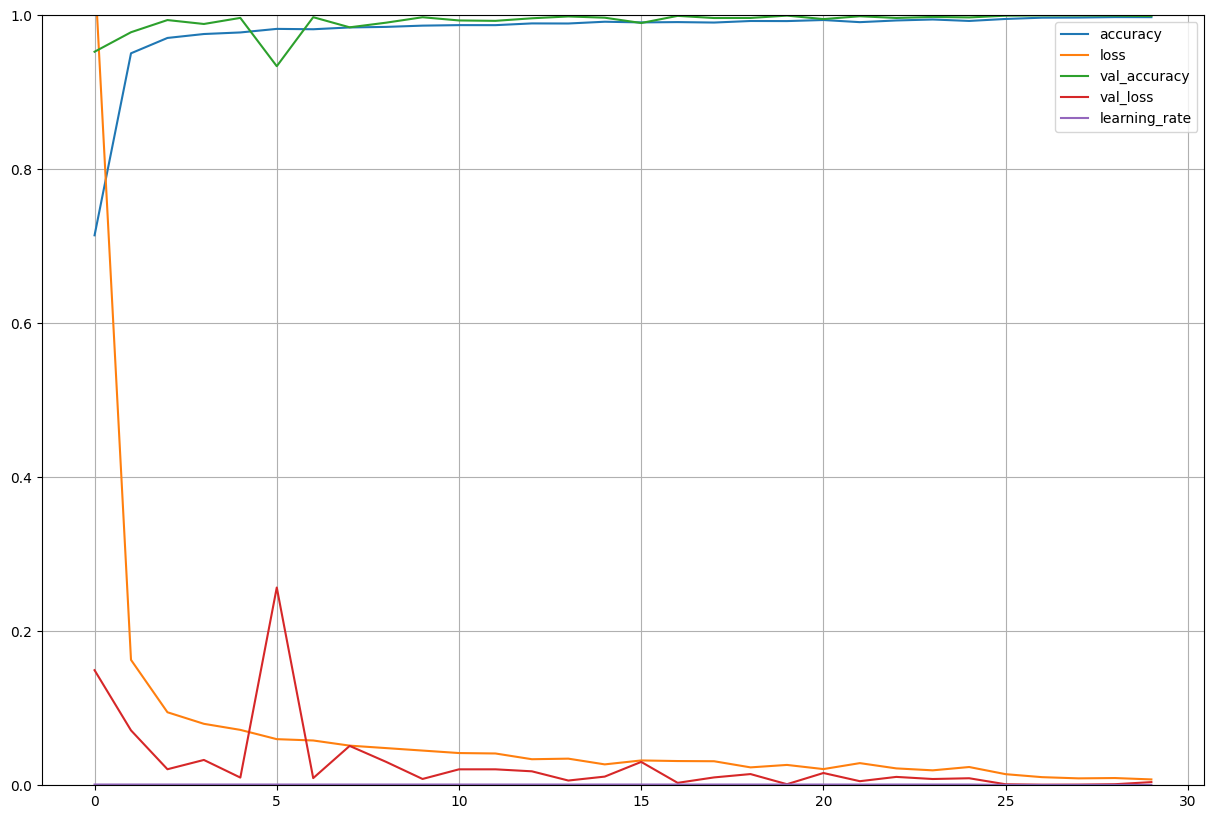

In [38]:
custom_model.save("custom_model.keras")

pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
#load test data

# Load test CSV
test = pd.read_csv(data_dir / 'Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

print("Starting to load test images...")

for img in imgs:
    try:
        image = cv2.imread(str(data_dir / img))
        if image is not None:
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            data.append(np.array(resize_image))
        else:
            print(f"[Warning] Could not load image: {img}")
    except Exception as e:
        print(f"[Error] {img}: {e}")

X_test = np.array(data)
X_test = X_test / 255.0  # Normalize

# Predict
pred_probs = custom_model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)

# Accuracy
test_acc = accuracy_score(labels, pred) * 100
print(f'Test Data Accuracy: {test_acc:.2f}%')

Starting to load test images...
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Test Data Accuracy: 98.90%


<Axes: >

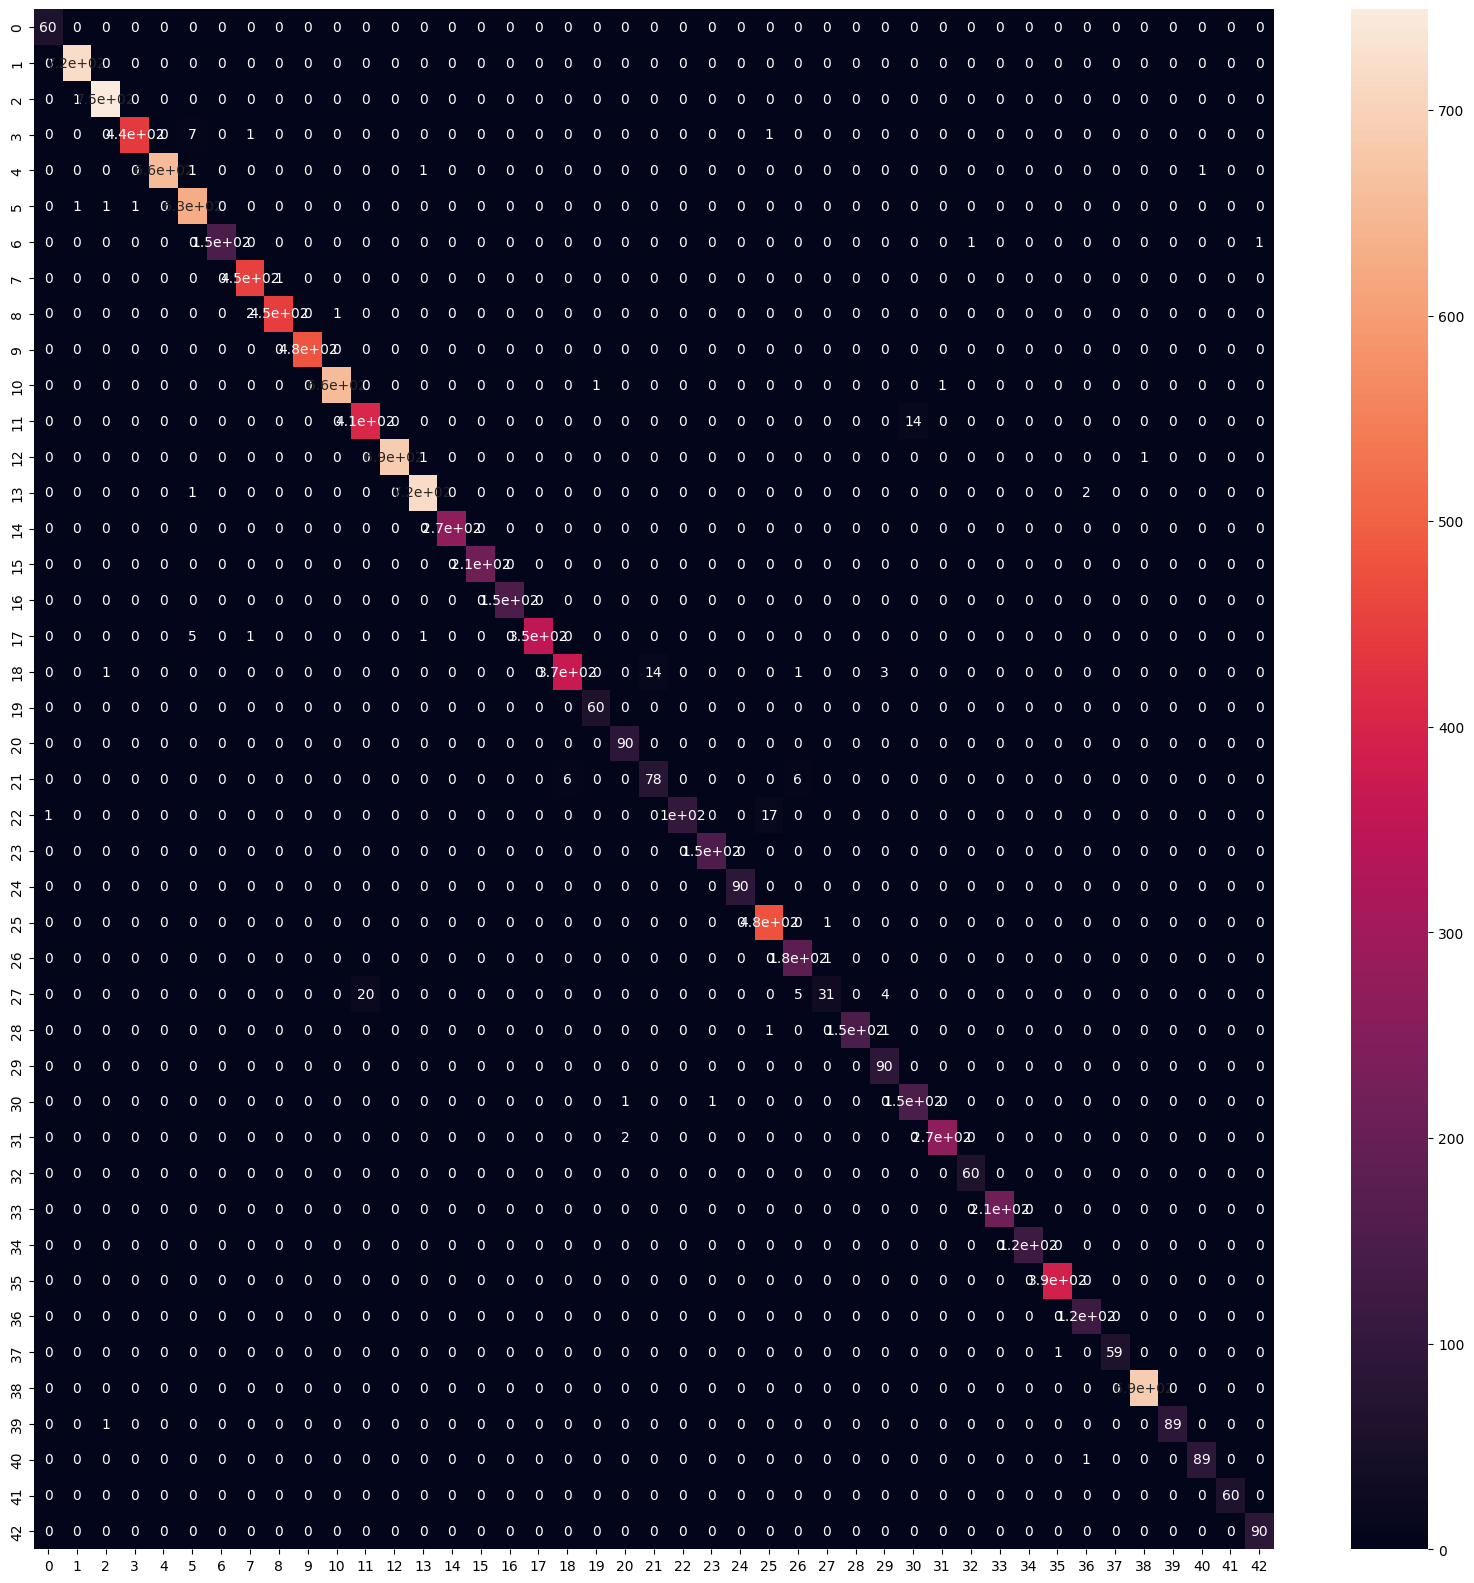

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(labels, pred)
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00       720
           2       1.00      1.00      1.00       750
           3       1.00      0.98      0.99       450
           4       1.00      1.00      1.00       660
           5       0.98      1.00      0.99       630
           6       1.00      0.99      0.99       150
           7       0.99      1.00      0.99       450
           8       1.00      0.99      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.95      0.97      0.96       420
          12       1.00      1.00      1.00       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       1.00      1.00      1.00       150
          17       1.00    

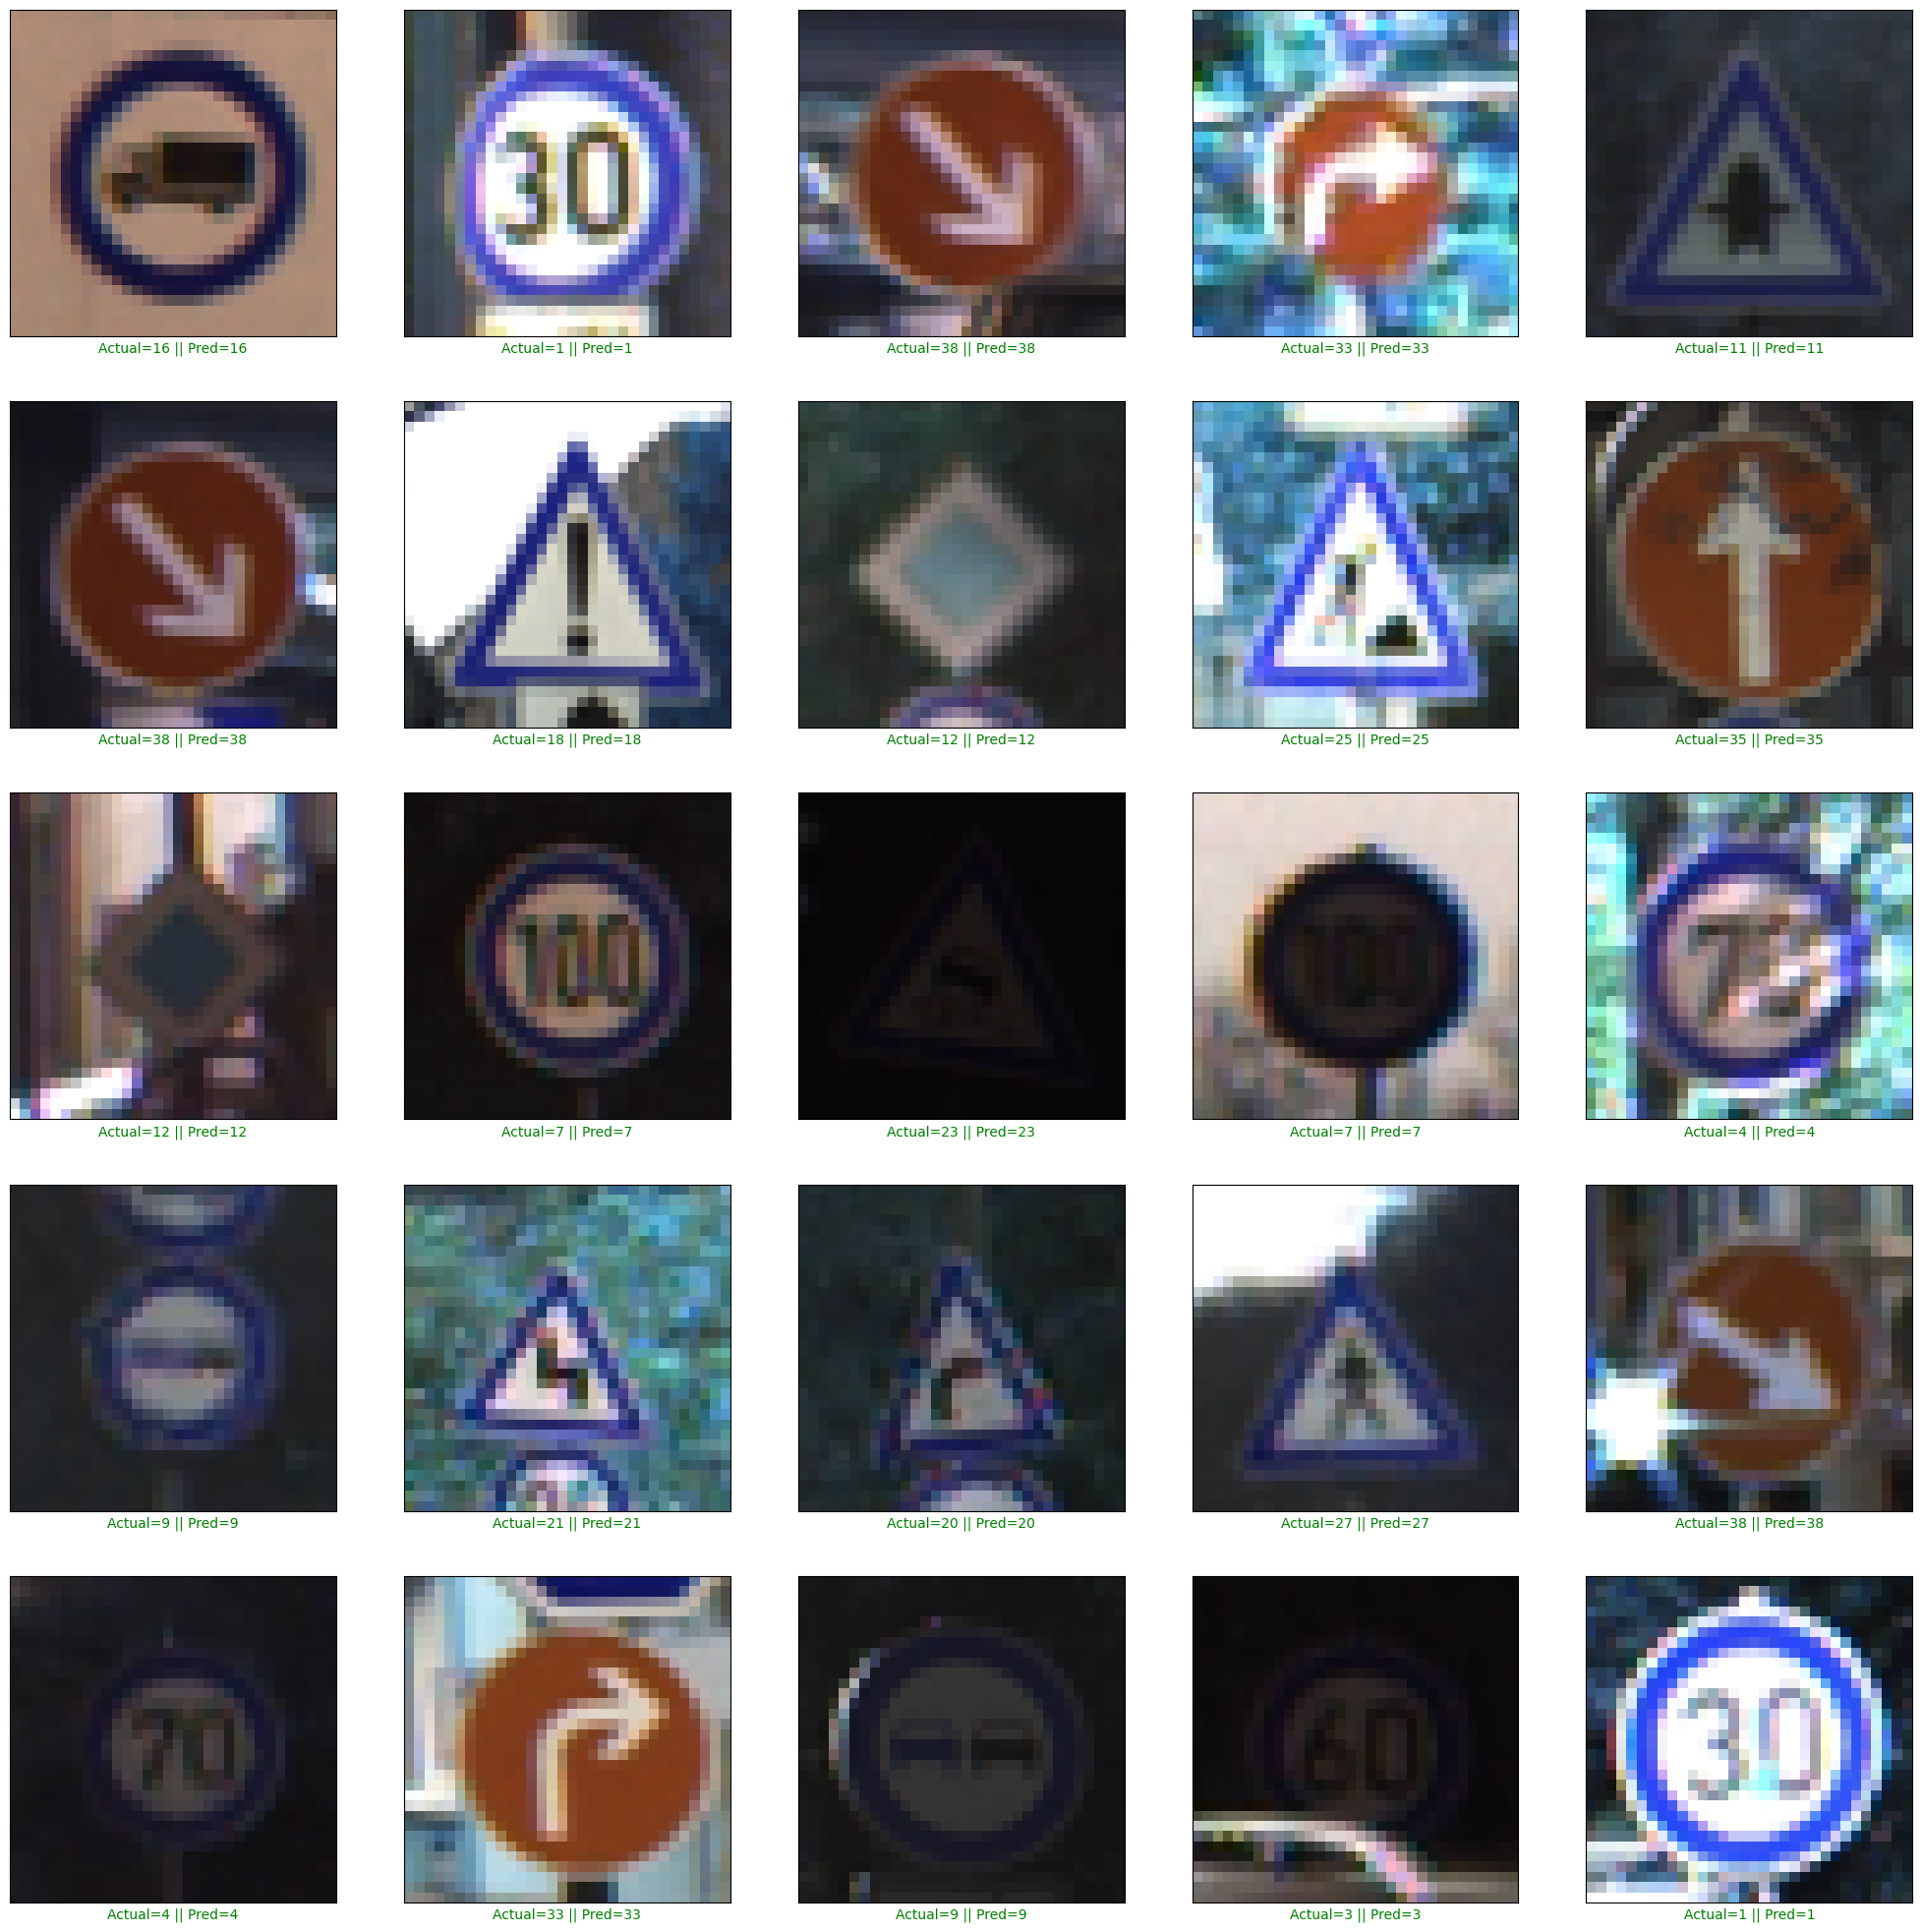

In [43]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()